1 - Định nghĩa lớp Vexter theo tài liệu của thầy

In [14]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}
        self.color = 'white'
        self.distance = 0
        self.pred = None
        # for dfs
        self.discovery = 0
        self.finish = 0

    def addNeighbor(self,nbr,weight=0): #key chính là object
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

    def getColor(self):
        return self.color
    def setColor(self, color):
       self.color = color

    def getDistance(self):
        return self.distance
    def setDistance(self, distance):
        self.distance = distance

    def getPred(self):
        return self.pred
    def setPred(self, previous_node):
        self.pred = previous_node

    def getDiscovery (self):
        return self.discovery
    def setDiscovery (self, discovery_time):
        self.discovery = discovery_time

    def getFinish (self):
        return self.finish
    def setFinish (self, finish_time):
        self.finish = finish_time

2 - Định nghĩa lớp Graph

In [15]:
from queue import Queue
import networkx as nx
import time as sleep
import tempfile
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!apt install libgraphviz-dev
!pip install pygraphviz

import pygraphviz as pgv
from typing import Text


class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0
        self.is_direct = False
        #dfs
        self.time = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,weight=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

    def convertToNetworkX (self):
        # Create a graph
        nx_graph = nx.Graph()
        # Add vertices
        nx_graph.add_nodes_from([i for i in self.vertList.keys()])
        # Add edges with weights
        for f in self.vertList.keys(): #f là key ~ text
            for t in self.vertList[f].getConnections(): #t là 1 object
                nx_graph.add_edge(f, t.id, weight=self.vertList[f].getWeight(t))
        return nx_graph

    def convertToPyGraphviz (self):
        # Create a graph
        pgv_graph = pgv.AGraph(directed=True if self.is_direct==True else False)
        # Add vertices
        for i in self.vertList.keys():
            pgv_graph.add_node(i)
            pgv_graph.get_node(i).attr['style']='filled'
        # Add edges with weights
        for f in self.vertList.keys(): #f là key ~ text
            for t in self.vertList[f].getConnections(): #t là 1 object
                pgv_graph.add_edge(f, t.id, weight=self.vertList[f].getWeight(t))
        return pgv_graph


    def drawNetworkX (self):
        nx_graph = self.convertToNetworkX()
        # Define a color map for the nodes
        color_map = [self.vertList[x].color for x in self.vertList]
        # Define the node to be colored
        #colored_node = 'A'
        # Draw the graph with labels, weights, and color
        pos = nx.spring_layout(nx_graph)
        nx.draw_networkx_nodes(nx_graph, pos, node_size=500, node_color=color_map, alpha=0.5)
        nx.draw_networkx_labels(nx_graph, pos)
        nx.draw_networkx_edges(nx_graph, pos)
        labels = nx.get_edge_attributes(nx_graph, 'weight')
        nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=labels)
        # Show the graph
        plt.show()
        return

    def drawPyGraphviz(self):
        ag = self.convertToPyGraphviz()
        #ag = nx.nx_agraph.to_agraph(nx_graph)
        for i in self.vertList.keys():
            ag.get_node(i).attr['fillcolor'] = self.vertList[i].getColor()
            if self.vertList[i].getColor() == 'black':
              ag.get_node(i).attr['fontcolor'] = 'white'
            else:
              ag.get_node(i).attr['fontcolor'] = 'black'
        ag.layout(prog="dot")
        temp = tempfile.NamedTemporaryFile(delete=False)
        tempname = temp.name + ".png"
        ag.draw(tempname)
        img = mpimg.imread(tempname)
        plt.imshow(img)
        plt.show()
        os.remove(tempname)
        return

    def resetColornPred(self):
       self.time = 0
       for i in self.vertList.keys():
           self.vertList[i].setColor('white')
           self.vertList[i].setPred(None)


    def traverse(self, y):
        x = y
        while (x.getPred()):
            print(x.getId())
            x = x.getPred()
        print(x.getId())



    def bfs(self, startVertex, sleeptime=0):
        vertQueue = Queue()
        vertQueue.put(startVertex)
        while (vertQueue.qsize() > 0):
            currentVert = vertQueue.get()
            for nbr in currentVert.getConnections():
                if (nbr.getColor() == 'white'):
                    nbr.setColor('gray')
                    nbr.setDistance(currentVert.getDistance() + 1)
                    nbr.setPred(currentVert)
                    vertQueue.put(nbr)
            currentVert.setColor('black')
            self.drawPyGraphviz()
            sleep.sleep(sleeptime)


    def dfs(self,startVertex,sleeptime=0):
        startVertex.setColor('gray')
        self.drawPyGraphviz()
        sleep.sleep(sleeptime)
        self.time += 1
        startVertex.setDiscovery(self.time)
        for nextVertex in startVertex.getConnections():
            if nextVertex.getColor() == 'white':
                nextVertex.setPred(startVertex)
                self.dfs(nextVertex)
        startVertex.setColor('black')
        self.drawPyGraphviz()
        self.time += 1
        startVertex.setFinish(self.time)

    def loadFromTextFile(self, fname: Text):
        """
        Read from text file (input folder)
        <Vertex ID> <list of linked Vertex>
        """
        with open(fname, "r") as f:
            #Get full Nodes list first
            for line in f:
                lstxt = line.strip().split(',')
                #Get Node
                self.addVertex(lstxt[0])
            #Time to get edges
            f.seek(0,0)
            for line in f:
                lstxt = line.strip().split(',')
                for i in range(1, len(lstxt)):
                    self.addEdge(lstxt[0], lstxt[i])

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


3 - Chạy hàm main để kiểm tra kết quả

( FOOD , GOOD )
( FOOD , FOOT )
( FOOD , FOOL )
( GOOD , FOOD )
( FOOT , FOOD )
( FOOT , FOOL )
( FOOT , FORT )
( FOOL , FOOD )
( FOOL , FOOT )
( FOOL , POOL )
( FORT , FOOT )
( POOL , FOOL )
( POOL , POLL )
( PALE , SALE )
( PALE , POLE )
( PALE , PALM )
( SALE , PALE )
( SALE , SAGE )
( SALE , SALT )
( POLE , PALE )
( POLE , POLL )
( PALM , PALE )
( POLL , POLE )
( POLL , POOL )
( SAGE , SALE )
( SALT , SALE )


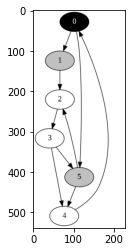

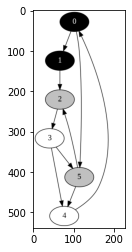

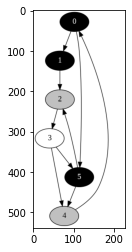

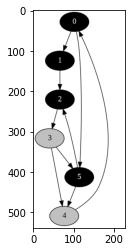

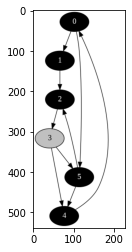

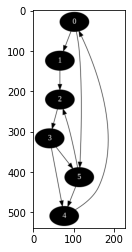

0


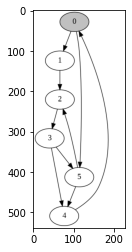

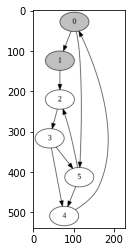

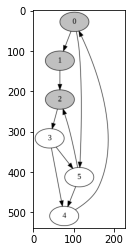

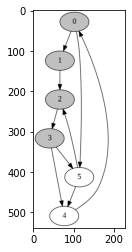

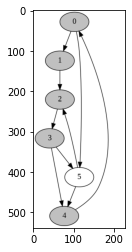

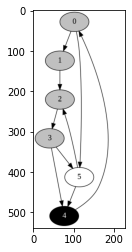

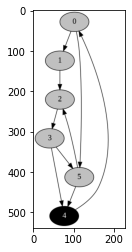

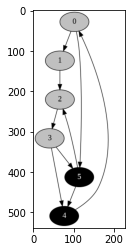

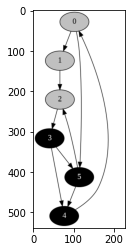

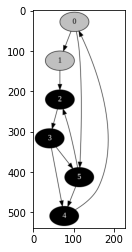

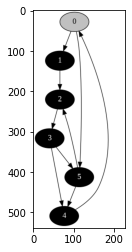

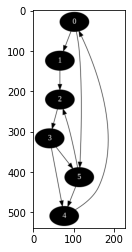

0


In [16]:



# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    ##################################
    #Graph of WORD vertices
    def buildGraph(wList):
        d = {}
        g = Graph()
        # phân hoạch các từ cùng độ dài chỉ khác nhau 1 ký tự
        for line in wList:  # lấy từng từ trong từ điển
            word = line[:]
            for i in range(len(word)):
                bucket = word[:i] + '_' + word[i + 1:]
                if bucket in d:
                    d[bucket].append(word)
                else:
                    d[bucket] = [word]
                    # thêm các đỉnh và các cạnh cho các từng trong cùng bucket
        for bucket in d.keys():
            for word1 in d[bucket]:
                for word2 in d[bucket]:
                    if word1 != word2:
                        g.addEdge(word1, word2)
        return g

    # main
    wList = ["FOOD", "FOOT", "FOOL", "FORT",
             "GOOD",
             "PALE", "PALM", "POLE", "POLL", "POOL",
             "SAGE", "SALE", "SALT"]
    g = buildGraph(wList)

    for v in g:
        for w in v.getConnections():
            print("( %s , %s )" % (v.getId(), w.getId()))

    #Uncomment to run
    #BFS
    #g.bfs(g.vertList['FOOD'])
    #g.traverse(g.vertList['SAGE'])

    #DFS
    #g.resetColornPred()
    #g.dfs(g.vertList['FOOD'])
    #g.traverse(g.vertList['SAGE'])

    ##################################
    #Graph of number vertices
    g2 = Graph()
    g2.loadFromTextFile('sample_data/input/exp1.txt')
    g2.is_direct = True

    #Uncomment to run
    g2.bfs(g2.vertList['0'])
    g2.traverse(g2.vertList['0'])

    g2.resetColornPred()
    g2.dfs(g2.vertList['0'])
    g2.traverse(g2.vertList['0'])
# See PyCharm help at https://www.jetbrains.com/help/pycharm/


# Mục mới